<a href="https://colab.research.google.com/github/hongrolee/Python/blob/main/colab/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81_KNN_%EC%8B%A4%EC%8A%B5%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SetUp

In [ ]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# sn.set()

# 폰트출력
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. 클러스터링**

## 1) 과일 사진 데이터 준비하기

In [ ]:
# 데이터 읽어오기
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('/content/drive/MyDrive/Colab Notebooks/csv/fruits_300.npy')

In [ ]:
# 데이터 크기 확인(shape)


In [ ]:
# 데이터 value 확인


In [ ]:
# 이미지 출력해 보기


In [ ]:
# cmap을 바꿔 이미지 출력해 보기(gray_r)


In [ ]:
# cmap의 종류 알아보기


In [ ]:
# 클래스 확인


## 2) 픽셀 값 분석하기

In [ ]:
# 각각의 클래스를 분리 후, 3차원에서 2차원 배열로 변환


In [ ]:
# 잘 변환되었는지 shape 확인


In [ ]:
# 사과 데이터의 평균값 확인


In [ ]:
# 히스토그램 그래프로 각 클래스의 픽셀값 분포 확인


In [ ]:
# 각 샘플들의 평균값 분포 확인


In [ ]:
# 각 클래스의 특성을 기준으로 평균값을 내어 100x100 2차원 배열로 변환


In [ ]:
# 평균값들을 이미지로 출력하여 분석


## 3) 평균값과 가까운 사진 고르기

In [ ]:
# 전체 샘플과 사과의 평균값과의 차이를 도출하고 차영상 출력


In [ ]:
# 차영상들의 평균값 도출


In [ ]:
# 정렬을 통해 사과와 가장 차이가 적은 인덱스 값들 도출, 그리고 출력


## <실습> 바나나 데이터를 동일하게 적용하여 출력해보기

In [ ]:
# 이번에는 바나나 데이터를 동일하게 적용


## <실습> 파인애플 데이터에 대해서도 동일하게 적용시켜보기

In [ ]:
# 이번에는 v파인애플 데이터를 동일하게 적용


# **2. kNN 및 k-Means**

## 1) kNN

In [ ]:
#import the mnist dastaser from sklearn
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", as_frame=False, version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X,y = mnist["data"], mnist["target"]

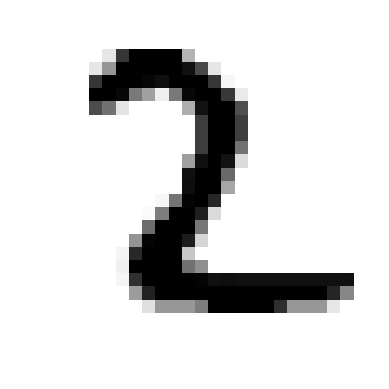

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
random_digit = X[360]
random_digit_image = random_digit.reshape(28,28)
plt.imshow(random_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
(train_X, test_X, train_y, test_y) = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
model = KNeighborsClassifier(n_neighbors = k)
model.fit(train_X,train_y)

score = model.score(test_X,test_y)
print(" k=", k, " and the accuracy is ",score*100)

 k= 5  and the accuracy is  96.92571428571428


최적의 K값은 어떻게 찾을 것인가?

In [ ]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np

model = KNeighborsClassifier(n_neighbors=2,n_jobs=1)
model.fit(train_X, train_y)

accuracy = accuracy_score(model.predict(test_X), test_y)
print(accuracy)
n_neighbors = np.array([7,8,9,10,12,15,20])
param_grid = dict(n_neighbors=n_neighbors)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(train_X, train_y)
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)

0.9636571428571429
0.9674666666666667
7


In [ ]:
print(grid.best_estimator_)

KNeighborsClassifier(n_jobs=1, n_neighbors=7)


## 2) k-Means

### 데이터 로드 및 분석

In [ ]:
# fruits 샘플들을 100x100의 1차원 배열로 변환


In [ ]:
# KMeans를 적용하여 영상 분류


In [ ]:
# 분류된 레이블 확인


In [ ]:
# 레이블의 종류 및 개수 확인


In [ ]:
# 과일 영상 출력해 보기
import matplotlib.pyplot as plt

# array를 입력받아 과일 영상들을 출력하는 함수
def draw_fruits(arr, ratio=1):

    # 샘플 개수 도출
    n = len(arr)

    # 한 줄에 10개씩 이미지를 그리기 위해 샘플 개수를 10으로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n/10))

    # 열의 개수 계산
    cols = n if rows < 2 else 10

    # subplots 영상 생성
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)

    # 반복하며 영상 출력
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 출력
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

In [ ]:
# 레이블이 0인 영상들 출력


In [ ]:
# 레이블이 1인 영상들 출력


In [ ]:
# 레이블이 2인 영상들 출력


### 클러스터 중심

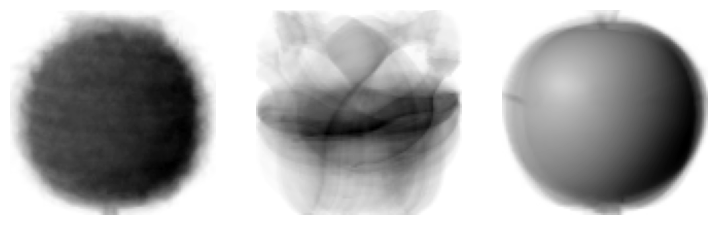

In [ ]:
# 클래스별 클러스터 중심 영상들 출력


In [ ]:
# 인덱스 100번 훈련데이터 샘플에서 클러스터 중심까지의 거리 출력


In [ ]:
# 인덱스 100번 훈련데이터 샘플의 레이블 예측해 보기


In [ ]:
# 인덱스 100번 훈련데이터 샘플 영상 출력해 보기


In [ ]:
# 알고리즘이 반복한 횟수 확인


### 최적의 k 찾기
* 이너셔(inertia) : 클러스터 중심과 클러스터에 속한 샘플 사이의 거리의 제곱합

In [ ]:
# 최적의 K를 찾기 위한 그래프 그리기


# **3. PCA**

In [ ]:
# PCA를 사용하여 학습


In [ ]:
# 주성분 개수 확인


In [ ]:
# 주성분 영상으로 출력해 보기


> fruits_2d와 fruits_pca 크기 비교해 보기

In [ ]:
# fruits_2d 크기 확인


In [ ]:
# pca 변환 수행


In [ ]:
# fruits_pca 크기 확인


## 1) 원본 데이터 재구성

In [ ]:
# pca변환된 데이터를 원본 데이터로 재변환


In [ ]:
# 영상 출력을 위해 reshape(-1,100,100)


In [ ]:
# 재변환된 영상 출력


## 2) 설명된 분산
* 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 **설명된 분산(explained variance)**라고 함.
* PCA클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록
* 첫번째 주성분에 가장 큰 설명된 분산 값이 포함되고, 모두 합산하면 총 분산 비율을 얻을 수 있음

In [ ]:
# 설명된 분산의 합산값 도출


In [ ]:
# 설명된 분산 값 그래프로 출력


## 3) 다른 알고리즘과 함께 사용하기
* PCA로 축소한 데이터를 지도학습에 적용하여 어떤 차이가 있는지 확인

> 로지스틱회귀 모델을 적용하여 분류

In [ ]:
# 로지스틱회귀 모델 생성


In [ ]:
# 타겟값 생성


In [ ]:
# 원본 데이터를 이용하고, 교차검증을 통한 성능 측정 (test_score 및 fit_time)


In [ ]:
# PCA 데이터를 이용하고, 교차검증을 통한 성능 측정 (test_score 및 fit_time)


In [ ]:
# 주성분의 개수 대신 원하는 <설명된 분산>값의 입력을 통한 PCA 학습


In [ ]:
# 생성된 PCA컴포넌트 개수 확인


In [ ]:
# 변환된 데이터의 크기 확인


In [ ]:
# 교차검증을 통한 성능 측정('test_score', 'fit_time')


> k-means 알고리즘을 적용하여 분류

In [ ]:
# k-means 모델 생성 및 훈련


In [ ]:
# 도출된 레이블 및 개수 확인


In [ ]:
# 결과 영상 모두 출력


In [ ]:
# 그래프로 3개의 클래스 출력
